In [2]:
import numpy as np
import pandas as pd
from apyori import apriori
import matplotlib.pyplot as plt

In [3]:
marketdf = pd.read_csv("groceries_final.csv",header = None)
display(marketdf.head())
print(marketdf.shape)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(9835, 32)


In [4]:
def prune_Dataset(input_df= marketdf,length_trans = 2,total_sales_perc = 0.40):
    final_df2 = pd.DataFrame()
    for i in range(input_df.shape[0]):
        cnt = 0
        new_input = input_df.iloc[:][i:i+1]
        for j in range(new_input.shape[1]):
            if new_input.iloc[:,j].isnull().any():
                if cnt <= length_trans:
                    break
                if cnt == 31:
                    final_df2 = pd.concat([final_df2, new_input], ignore_index=True)
            cnt+=1
    dict2 = dict()
    for i in range(final_df2.shape[1]):
        for j in range(final_df2.shape[0]):
            if final_df2[i][j] == "nan":
                continue
            elif final_df2[i][j] in list(dict2.keys()):
                dict2[final_df2[i][j]] += 1
            else:
                dict2[final_df2[i][j]] =1               
    total_purchase = sum(list(dict2.values()))
    market_sort = []
    for i,j in sorted(dict2.items(), 
                      key=lambda item: item[1], reverse = True):
        market_sort.append([i,j,float(int(j) * 100   /total_purchase)])
    new_market_df = pd.DataFrame(market_sort,columns=["item_name","item_count","item_perc"])
    new_market_df2 = new_market_df[new_market_df["item_name"].isnull() == False]
    new_total_purchase = sum(new_market_df2["item_count"])
    new_market_df3 = new_market_df2[["item_name","item_count"]]
    li = []
    for i in range(new_market_df3.shape[0]):
        li.append(float(new_market_df3["item_count"][i:i+1] / new_total_purchase))
    new_market_df3.insert(2,"item_perc",li,True)
    out_df = pd.DataFrame()
    for i in range(new_market_df3.shape[0]):
        if sum(new_market_df3["item_perc"].head(i)) > total_sales_perc:
            out_df = new_market_df3.head(i-1)
            break
    final_list = [final_df2,new_market_df2,new_market_df3,out_df]
    return final_list

In [6]:
final_market_list = prune_Dataset()
final_item_df = final_market_list[0]
display(final_item_df.head(20))

C:\Users\Prakriti\AppData\Local\Temp\ipykernel_24172\2977042945.py:33: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  li.append(float(new_market_df3["item_count"][i:i+1] / new_total_purchase))


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,tropical fruit,other vegetables,white bread,bottled water,chocolate,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,citrus fruit,tropical fruit,whole milk,butter,curd,yogurt,flour,bottled water,dishes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,frankfurter,rolls/buns,soda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,butter,sugar,fruit/vegetable juice,newspapers,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\Prakriti\AppData\Local\Temp\ipykernel_24172\2977042945.py:33: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  li.append(float(new_market_df3["item_count"][i:i+1] / new_total_purchase))


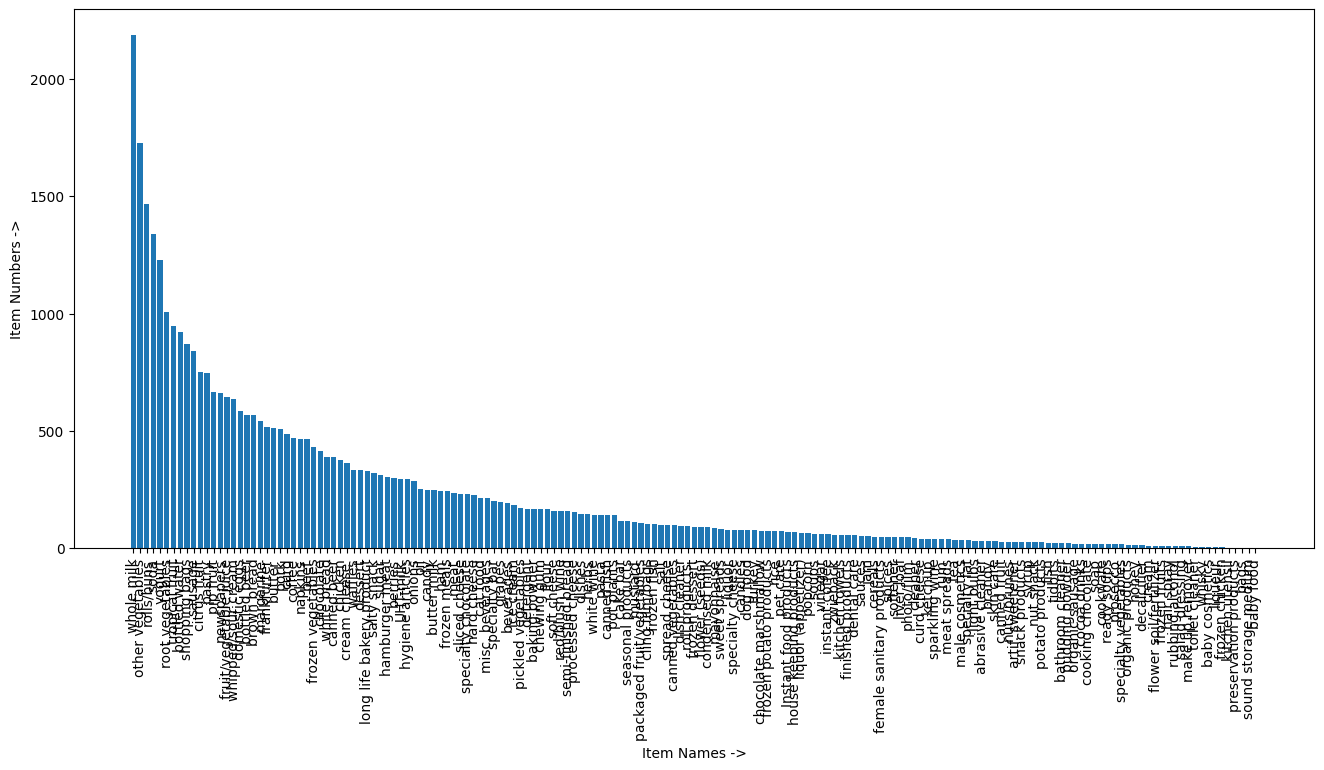

In [8]:
final_market_list = prune_Dataset()
output_df = final_market_list[1]  # assuming the second element of the list is the output_df
plt.figure(figsize=[16,7])
plt.bar(output_df["item_name"],output_df["item_count"])
plt.ylabel("Item Numbers ->")
plt.xlabel("Item Names ->")
plt.xticks(rotation = 90)
plt.show()

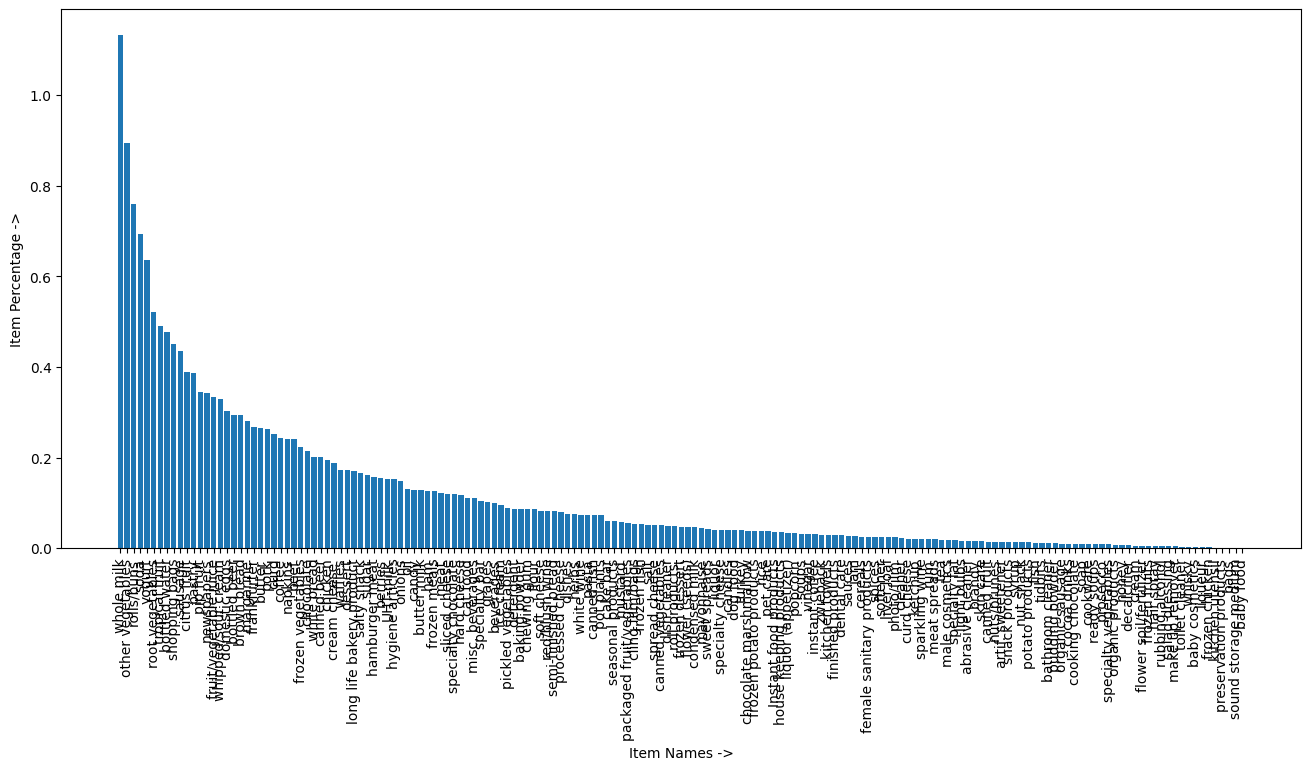

In [18]:
plt.figure(figsize=[16,7])
plt.bar(output_df["item_name"],output_df["item_perc"])
plt.ylabel("Item Percentage ->")
plt.xlabel("Item Names ->")
plt.xticks(rotation = 90)
plt.show()

In [19]:
records = []
row = final_item_df.shape[0]
col = final_item_df.shape[1]
for i in range(0,row):
    records.append([str(final_item_df.values[i,j]) for j in range(0, col)])

In [25]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)
print("There are {} Relation derived.".format(len(association_results)))
print(association_results)

There are 66 Relation derived.
[RelationRecord(items=frozenset({'Instant food products', 'hamburger meat'}), support=0.004973474801061008, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Instant food products'}), items_add=frozenset({'hamburger meat'}), confidence=0.4225352112676056, lift=8.43951123962317)]), RelationRecord(items=frozenset({'liquor', 'bottled beer'}), support=0.005802387267904509, ordered_statistics=[OrderedStatistic(items_base=frozenset({'liquor'}), items_add=frozenset({'bottled beer'}), confidence=0.4375, lift=4.637961335676626)]), RelationRecord(items=frozenset({'red/blush wine', 'bottled beer'}), support=0.007625994694960212, ordered_statistics=[OrderedStatistic(items_base=frozenset({'red/blush wine'}), items_add=frozenset({'bottled beer'}), confidence=0.2911392405063291, lift=3.086382950323686)]), RelationRecord(items=frozenset({'flour', 'sugar'}), support=0.007791777188328912, ordered_statistics=[OrderedStatistic(items_base=frozenset({'flour'}), items

In [32]:
results = []
for item in association_results:
    pair = item[0]
    items = [x for x in pair]
    
    consequent = str(items[0])
    antecedent = str(items[1])
    support = str(int(float(str(item[1])[:7]) * 100000))
    confidence = str(item[2][0][2])[:7]
    lift = str(item[2][0][3])[:7]
    
    rows = (consequent,antecedent,support,confidence,lift)
    results.append(rows)
    
    final_result = pd.DataFrame(results,columns=['Consequent','Anticedent','Support','Confidence','Lift'])

In [34]:
final_result = final_result.sort_values("Support",ascending=False,ignore_index=True)
final_result = final_result[(final_result["Consequent"] != 'nan') & (final_result["Anticedent"] != 'nan')].sort_values("Support",ignore_index=True)
display(final_result)
for i in range(final_result.shape[0]):
    print(f"OFFER!! With {final_result.Anticedent[i:i+1].values[0]} we reccomend you to buy {final_result.Consequent[i:i+1].values[0]}.")

,Consequent,Anticedent,Support,Confidence,Lift
0,whole milk,beef,464,0.37837,3.13083
1,citrus fruit,pip fruit,464,0.21052,3.65963
2,sausage,beef,464,0.51851,3.11214
3,beef,root vegetables,464,0.50909,3.05555
4,yogurt,butter,479,0.29896,4.27341
5,tropical fruit,yogurt,479,0.29896,4.27341
6,long life bakery product,whole milk,496,0.22556,3.27855
7,citrus fruit,root vegetables,496,0.29702,4.40216
8,onions,whole milk,496,0.25641,3.01494
9,Instant food products,hamburger meat,496,0.42253,8.43951


OFFER!! With beef we reccomend you to buy whole milk.
OFFER!! With pip fruit we reccomend you to buy citrus fruit.
OFFER!! With beef we reccomend you to buy sausage.
OFFER!! With root vegetables we reccomend you to buy beef.
OFFER!! With butter we reccomend you to buy yogurt.
OFFER!! With yogurt we reccomend you to buy tropical fruit.
OFFER!! With whole milk we reccomend you to buy long life bakery product.
OFFER!! With root vegetables we reccomend you to buy citrus fruit.
OFFER!! With whole milk we reccomend you to buy onions.
OFFER!! With hamburger meat we reccomend you to buy Instant food products.
OFFER!! With pip fruit we reccomend you to buy whole milk.
OFFER!! With tropical fruit we reccomend you to buy whole milk.
OFFER!! With root vegetables we reccomend you to buy whipped/sour cream.
OFFER!! With whole milk we reccomend you to buy onions.
OFFER!! With butter we reccomend you to buy yogurt.
OFFER!! With pip fruit we reccomend you to buy root vegetables.
OFFER!! With yogurt we 